<a href="https://colab.research.google.com/github/rtan01/Group1Project1/blob/main/DataApendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
var_list = ['prochoic', 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']


output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0


for k in range(3):
    url = f'https://github.com/DS3001/project_gss/raw/main/gss_chunk_{k+1}.parquet'
    df = pd.read_parquet(url, columns=var_list)
    header = True if phase == 0 else False
    df.to_csv(output_file, mode=modes[phase], header=header, index=False)

    phase = 1
df = pd.read_csv(output_file)
df.to_csv('df.csv', index=False)

In [3]:
# Summary statistics for numerical variables
print(df.shape[0])
print(df.info())
df.head()



72390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prochoic  3551 non-null   object 
 1   partyid   71905 non-null  object 
 2   year      72390 non-null  int64  
 3   age       71621 non-null  float64
 4   income    63439 non-null  object 
 5   polviews  62718 non-null  object 
 6   relig     71953 non-null  object 
 7   region    72390 non-null  object 
 8   abany     39258 non-null  object 
 9   prolife   3537 non-null   object 
 10  sex       72278 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 6.1+ MB
None


,prochoic,partyid,year,age,income,polviews,relig,region,abany,prolife,sex
0,NaN,"independent, close to democrat",1972,23.0,NaN,NaN,jewish,east north central,NaN,NaN,female
1,NaN,not very strong democrat,1972,70.0,NaN,NaN,catholic,east north central,NaN,NaN,male
2,NaN,"independent (neither, no response)",1972,48.0,NaN,NaN,protestant,east north central,NaN,NaN,female
3,NaN,not very strong democrat,1972,27.0,NaN,NaN,other,east north central,NaN,NaN,female
4,NaN,strong democrat,1972,61.0,NaN,NaN,protestant,east north central,NaN,NaN,female


In [ ]:
variables = ['prochoic', 'partyid', 'year', 'age', 'income', 'polviews', 'relig', 'region', 'abany', 'prolife', 'sex']

# Print variable types
print("Variable Types:")
print(df[variables].dtypes)

# Analyzing unique response codes for each variable
print("Unique Response Codes:")
for var in variables:
    unique_values = df[var].unique()
    print(f"{var}: {unique_values}")

#Summary of missing values per column
missing_summary = df.isnull().sum()
print("Missing values per column:", missing_summary)


Variable Types:
prochoic     object
partyid      object
year          int64
age         float64
income       object
polviews     object
relig        object
region       object
abany        object
prolife      object
sex          object
dtype: object
Unique Response Codes:
prochoic: ['strongly agree' 'disagree' 'agree' 'neither agree nor disagree'
 'strongly disagree']
partyid: ['independent, close to democrat' 'not very strong republican'
 'strong democrat' 'other party' 'independent (neither, no response)'
 'not very strong democrat' 'independent, close to republican'
 'strong republican']
year: [2021]
age: [61. 23. 20. 33. 43. 44. 30. 52. 62. 24. 57. 31. 82. 42. 63. 41. 66. 79.
 38. 68. 71. 89. 28. 37. 87. 74. 45. 36. 32. 70. 78. 46. 67. 47. 60. 64.
 34. 53. 48. 25. 65. 29. 69. 39. 59. 75. 49. 27. 73. 51. 26. 22. 50. 55.
 72. 40. 56. 80. 35. 76. 84. 81. 85. 77. 58. 54. 21. 83. 19. 86. 88.]
income: ['$8,000 to $9,999' '$25,000 or more' '$20,000 to $24,999'
 '$10,000 to $14,999' '$1,00

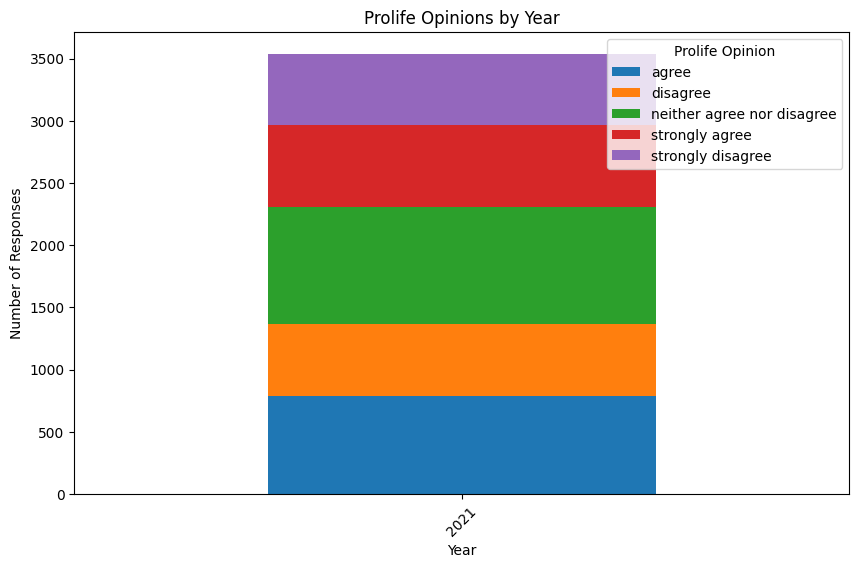

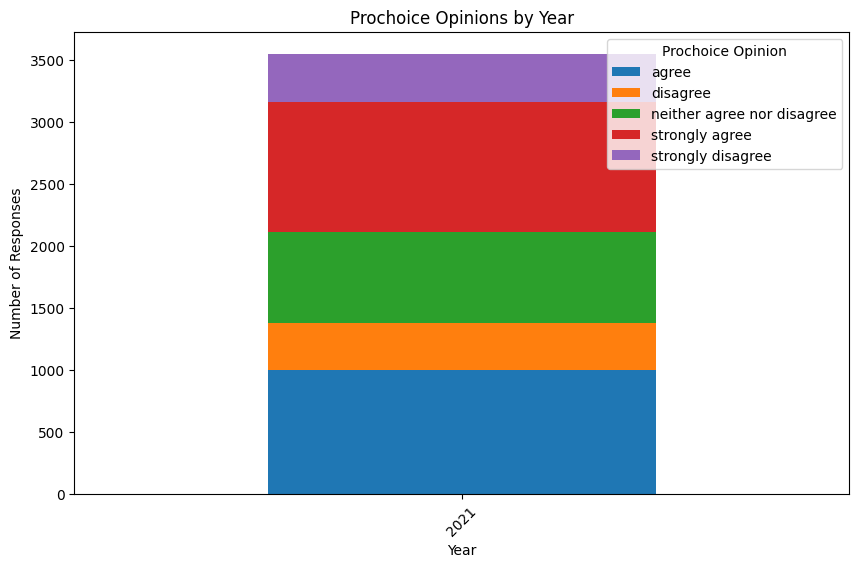

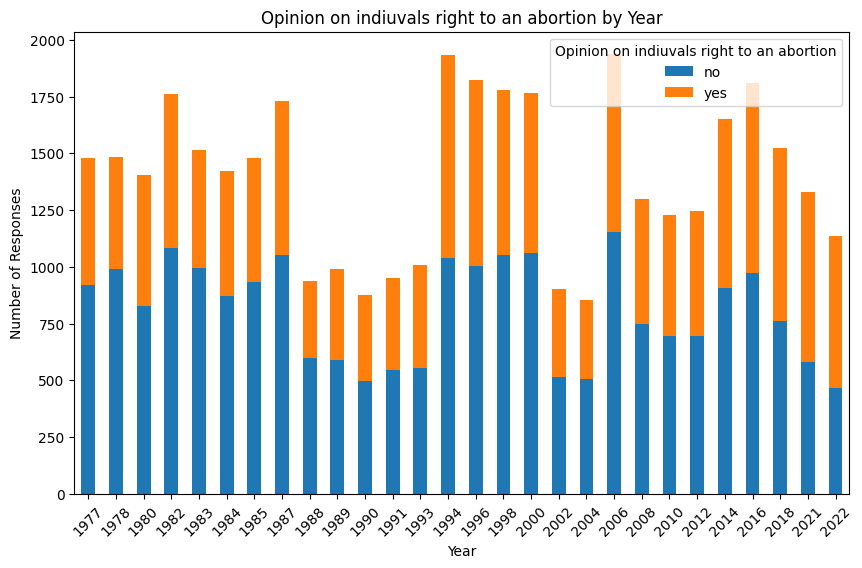

In [5]:
import matplotlib.pyplot as plt

# Aggregate data and plotting by year
aggregated_prolife = df.groupby(['year', 'prolife']).size().unstack(fill_value=0)
aggregated_prolife.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Prolife Opinions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend(title='Prolife Opinion')
plt.xticks(rotation=45)
plt.show()


aggregated_prochoic = df.groupby(['year', 'prochoic']).size().unstack(fill_value=0)
aggregated_prochoic.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Prochoice Opinions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend(title='Prochoice Opinion')
plt.xticks(rotation=45)
plt.show()

aggregated_abany = df.groupby(['year', 'abany']).size().unstack(fill_value=0)
aggregated_abany.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Opinion on indiuvals right to an abortion by Year')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend(title='Opinion on indiuvals right to an abortion')
plt.xticks(rotation=45)
plt.show()

#Revealed that the prolife prochoic variable was only collected in 2021

In [17]:
##Clean data##
#Drop data that is not from 2021
df = df[df['year'] == 2021]
# Check if there are any more missing values in the DataFrame
missing_summary = df.isnull().sum()
print("Missing values per column:", missing_summary)
# Drop missing data
df = df.dropna(subset=var_list)
#Remove Duplicate Entries
df = df.drop_duplicates()
# Ensure Consistency in Categorical Data
df['income'] = df['income'].str.lower().str.strip()
df['polviews'] = df['polviews'].str.lower().str.strip()
df['relig'] = df['relig'].str.lower().str.strip()
df['prochoic'] = df['prochoic'].str.lower().str.strip()
df['prolife'] = df['prolife'].str.lower().str.strip()
df['sex'] = df['sex'].str.lower().str.strip()
df['abany'] = df['abany'].str.lower().str.strip()
df['region'] = df['region'].str.lower().str.strip()

#Save clean data
df.to_csv('cleaned_data.csv', index=False)



Missing values per column: prochoic    0
partyid     0
year        0
age         0
income      0
polviews    0
relig       0
region      0
abany       0
prolife     0
sex         0
dtype: int64


In [8]:
# Summary statistics for numerical variables
print(df.shape[0])
print(df.info())
df.head()

1027
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 64823 to 68842
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prochoic  1027 non-null   object 
 1   partyid   1027 non-null   object 
 2   year      1027 non-null   int64  
 3   age       1027 non-null   float64
 4   income    1027 non-null   object 
 5   polviews  1027 non-null   object 
 6   relig     1027 non-null   object 
 7   region    1027 non-null   object 
 8   abany     1027 non-null   object 
 9   prolife   1027 non-null   object 
 10  sex       1027 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 96.3+ KB
None


,prochoic,partyid,year,age,income,polviews,relig,region,abany,prolife,sex
64823,strongly agree,"independent, close to democrat",2021,61.0,"$8,000 to $9,999",conservative,protestant,middle atlantic,yes,neither agree nor disagree,female
64825,disagree,not very strong republican,2021,23.0,"$25,000 or more",slightly conservative,muslim/islam,middle atlantic,no,strongly agree,male
64829,strongly agree,strong democrat,2021,20.0,"$25,000 or more",liberal,none,middle atlantic,yes,strongly disagree,female
64833,strongly agree,other party,2021,33.0,"$25,000 or more",liberal,none,middle atlantic,yes,strongly disagree,female
64840,strongly agree,"independent (neither, no response)",2021,43.0,"$25,000 or more",liberal,none,middle atlantic,yes,disagree,female


In [ ]:
# Print variable types
print("Variable Types:")
print(df[variables].dtypes)

# Analyzing unique response codes for each variable
print("Unique Response Codes:")
for var in variables:
    unique_values = df[var].unique()
    print(f"{var}: {unique_values}")

Variable Types:
prochoic     object
partyid      object
year          int64
age         float64
income       object
polviews     object
relig        object
region       object
abany        object
prolife      object
sex          object
dtype: object
Unique Response Codes:
prochoic: ['strongly agree' 'disagree' 'agree' 'neither agree nor disagree'
 'strongly disagree']
partyid: ['independent, close to democrat' 'not very strong republican'
 'strong democrat' 'other party' 'independent (neither, no response)'
 'not very strong democrat' 'independent, close to republican'
 'strong republican']
year: [2021]
age: [61. 23. 20. 33. 43. 44. 30. 52. 62. 24. 57. 31. 82. 42. 63. 41. 66. 79.
 38. 68. 71. 89. 28. 37. 87. 74. 45. 36. 32. 70. 78. 46. 67. 47. 60. 64.
 34. 53. 48. 25. 65. 29. 69. 39. 59. 75. 49. 27. 73. 51. 26. 22. 50. 55.
 72. 40. 56. 80. 35. 76. 84. 81. 85. 77. 58. 54. 21. 83. 19. 86. 88.]
income: ['$8,000 to $9,999' '$25,000 or more' '$20,000 to $24,999'
 '$10,000 to $14,999' '$1,00

Descriptive Statistics for Age:
count    1027.000000
mean       52.586173
std        16.651898
min        19.000000
25%        39.000000
50%        52.000000
75%        66.000000
max        89.000000
Name: age, dtype: float64


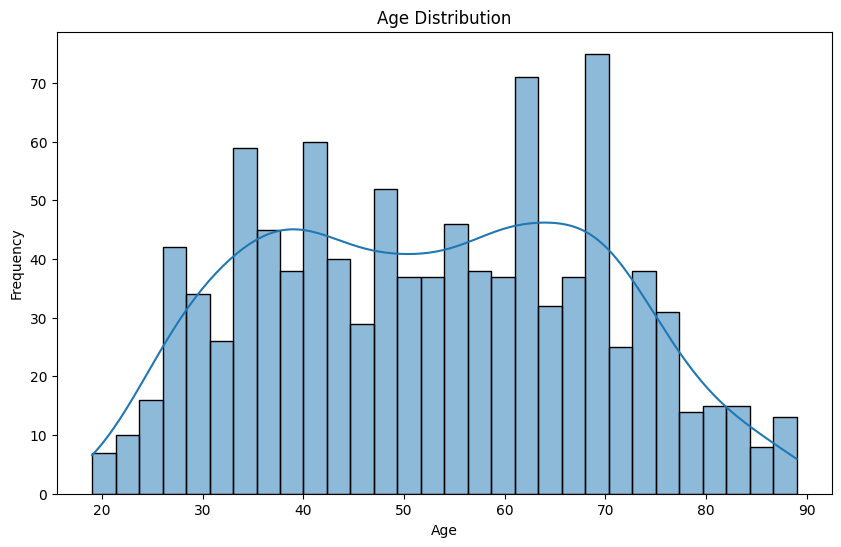

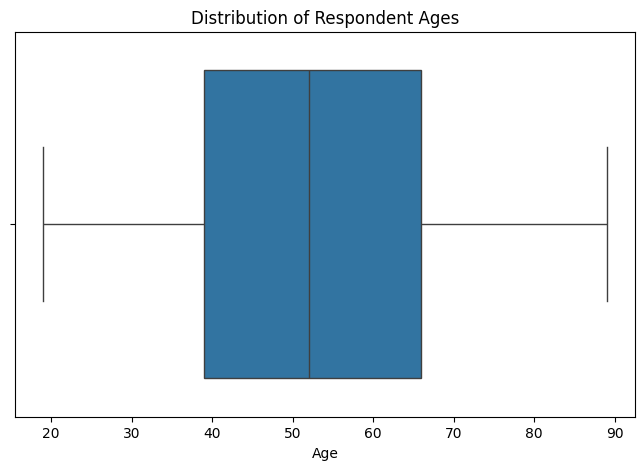


Frequency Counts for Income Levels:
$25,000 or more       833
$10,000 to $14,999     45
$20,000 to $24,999     41
$15,000 to $19,999     41
$8,000 to $9,999       17
under $1,000           15
$1,000 to $2,999       12
$7,000 to $7,999        9
$3,000 to $3,999        6
$4,000 to $4,999        3
$5,000 to $5,999        3
$6,000 to $6,999        2
Name: income, dtype: int64


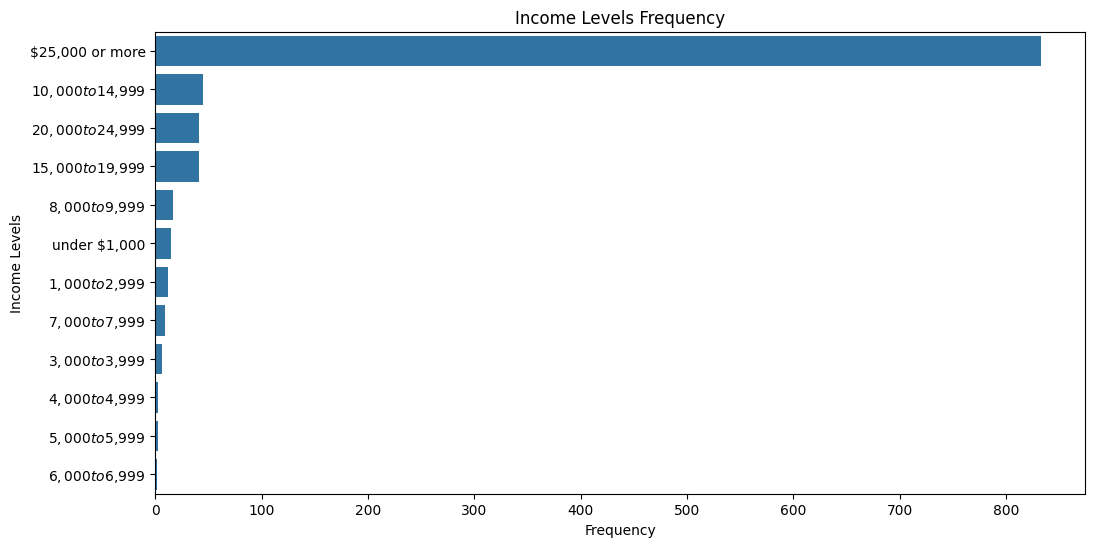


Frequency Counts for Region:
south atlantic         212
east north central     181
pacific                133
middle atlantic        105
west south central      94
mountain                94
west north central      78
east south atlantic     77
new england             53
Name: region, dtype: int64


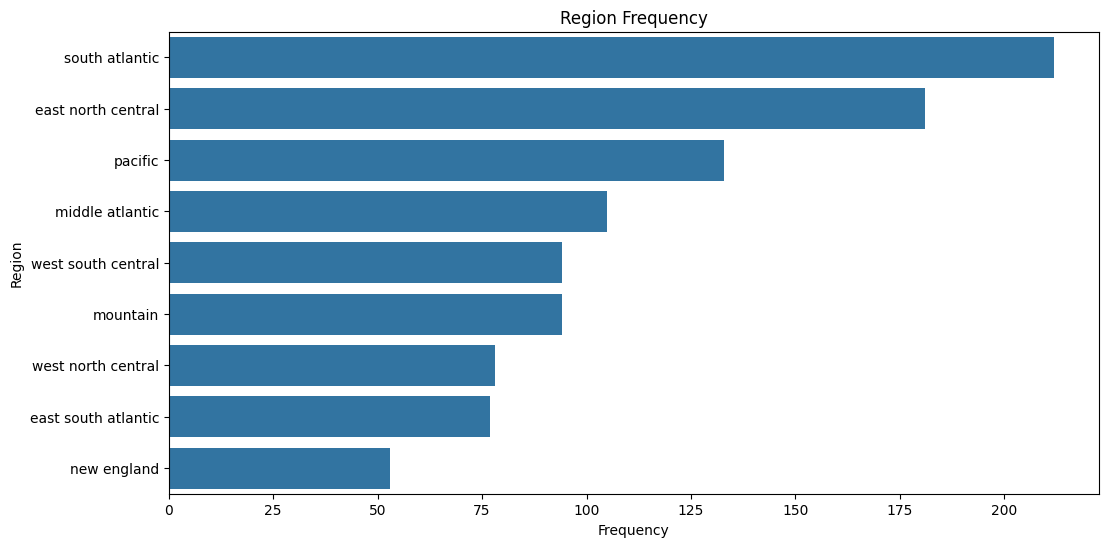


Frequency Counts for Sex:
female    554
male      473
Name: sex, dtype: int64


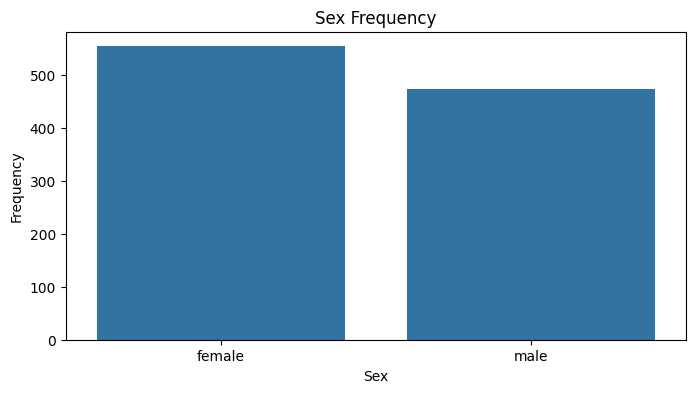


Frequency Counts for Religion:
protestant                 431
none                       283
catholic                   202
christian                   30
jewish                      22
buddhism                    15
other                       13
orthodox-christian          10
muslim/islam                 7
hinduism                     7
inter-nondenominational      5
native american              2
Name: relig, dtype: int64


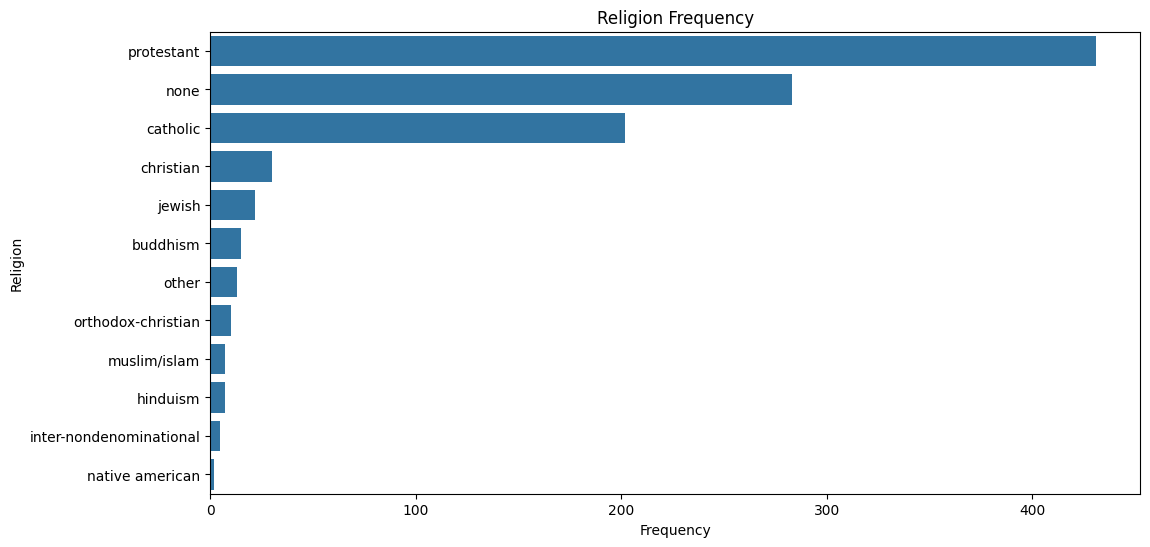


Frequency Counts for Prochoice Opinions:
agree                         300
strongly agree                293
neither agree nor disagree    205
disagree                      123
strongly disagree             106
Name: prochoic, dtype: int64


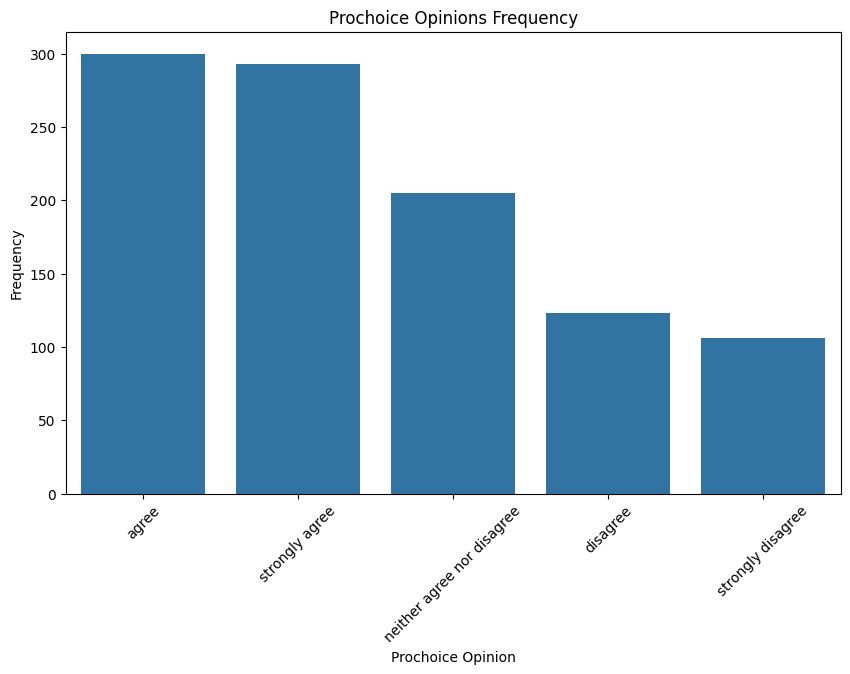


Frequency Counts for Prolife Opinions:
neither agree nor disagree    257
agree                         227
strongly agree                182
disagree                      181
strongly disagree             180
Name: prolife, dtype: int64


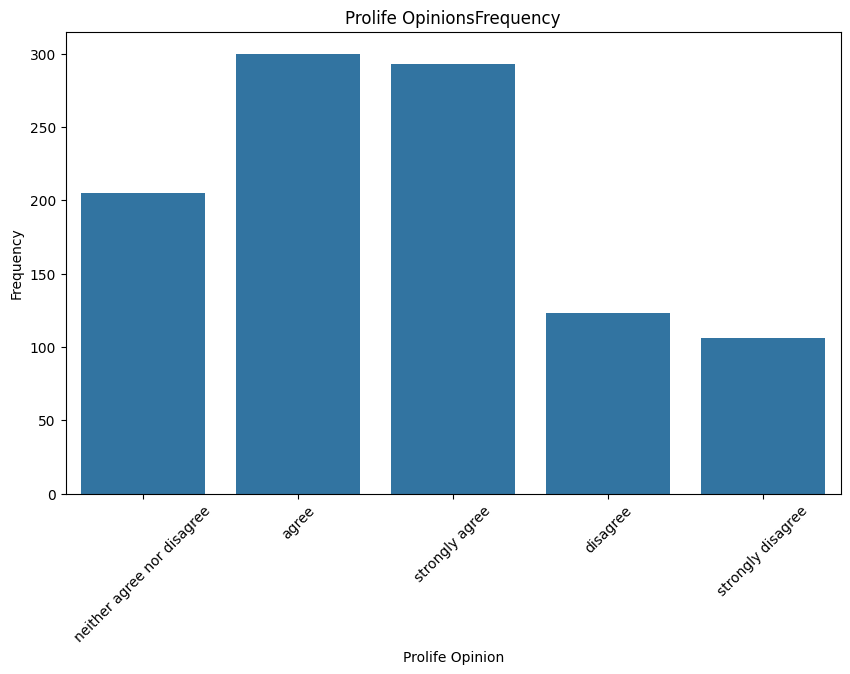


Frequency Counts for right to abortion Opinions:
neither agree nor disagree    257
agree                         227
strongly agree                182
disagree                      181
strongly disagree             180
Name: prolife, dtype: int64


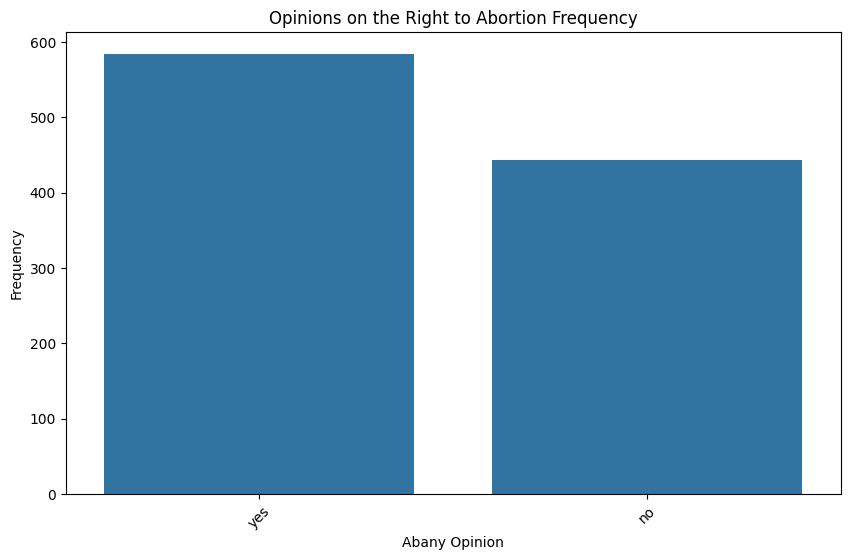

In [15]:
# Descriptive statistics for 'age'
print("Descriptive Statistics for Age:")
print(df['age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Age Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='age', data=df)
plt.title('Distribution of Respondent Ages')
plt.xlabel('Age')
plt.show()

# Frequency counts for 'income'
print("\nFrequency Counts for Income Levels:")
print(df['income'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='income', order = df['income'].value_counts().index)
plt.title('Income Levels Frequency')
plt.xlabel('Frequency')
plt.ylabel('Income Levels')
plt.show()

# Frequency counts for 'region'
print("\nFrequency Counts for Region:")
print(df['region'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='region', order = df['region'].value_counts().index)
plt.title('Region Frequency')
plt.xlabel('Frequency')
plt.ylabel('Region')
plt.show()


# Frequency counts for 'sex'
print("\nFrequency Counts for Sex:")
print(df['sex'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sex', order = df['sex'].value_counts().index)
plt.title('Sex Frequency')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Frequency counts for 'relig'
print("\nFrequency Counts for Religion:")
print(df['relig'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='relig', order = df['relig'].value_counts().index)
plt.title('Religion Frequency')
plt.xlabel('Frequency')
plt.ylabel('Religion')
plt.show()


# Frequency counts for 'prochoic'
print("\nFrequency Counts for Prochoice Opinions:")
print(df['prochoic'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='prochoic', order = df['prochoic'].value_counts().index)
plt.title('Prochoice Opinions Frequency')
plt.xlabel('Prochoice Opinion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Frequency counts for 'prolife'
print("\nFrequency Counts for Prolife Opinions:")
print(df['prolife'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='prochoic', order = df['prolife'].value_counts().index)
plt.title('Prolife OpinionsFrequency')
plt.xlabel('Prolife Opinion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



# Frequency counts for 'abany'
print("\nFrequency Counts for right to abortion Opinions:")
print(df['prolife'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='abany', order = df['abany'].value_counts().index)
plt.title('Opinions on the Right to Abortion Frequency')
plt.xlabel('Abany Opinion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




In [16]:
#Outlier Handling for age

q1, q3 = np.percentile(df['age'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
